The dilemma is: the developers say that at the very moment when Send-a-Tree reaches 25,000 free_tree sends per day, the current production server won't be able to handle the traffic and everything will crash. However, they are also busy with implementing a new payment solution, which is quite important too. They want to know what job should be prioritized. And they need this information from you!

The question is this: **in the next 4 weeks, will Send-a-Tree possibly reach the 25,000 free-tree sends per day?** 
*I am actually will try answer the 50k free-tree sends, as I'm doing the task later, and the actual figures have surpassed the 25k mark.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
free_tree = pd.read_csv('/home/dataguy/free_tree/free_tree.csv', header = None, delimiter = ' ', names = ['day','date','user_id','event'])

In [3]:
free_tree.tail()

,day,date,user_id,event
2133185,day_261,2020-05-30,1155020,sent_a_free_tree
2133186,day_261,2020-05-30,1184366,sent_a_free_tree
2133187,day_261,2020-05-30,1204763,sent_a_free_tree
2133188,day_261,2020-05-30,1223317,sent_a_free_tree
2133189,day_261,2020-05-30,1221725,sent_a_free_tree


In [23]:
daily_free = free_tree.groupby('date').count()[['event']].reset_index()

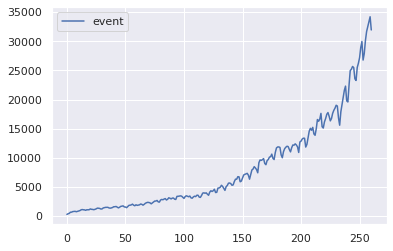

In [25]:
daily_free.plot()

In [26]:
#defining X and y values
X = daily_free.index
y = daily_free.event

In [77]:
#fitting the Linear Regression model
coefs = np.polyfit(X,y,1)
predict = np.poly1d(coefs)

In [29]:
#getting the R-squared for the Linear Regression model
from sklearn.metrics import r2_score
r2_score(y,predict(X))

0.8114150946922729

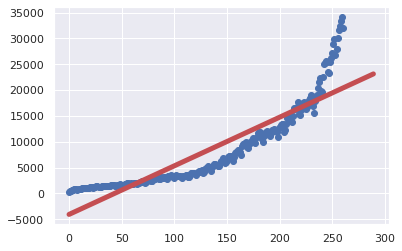

In [78]:
#visualizing data and the model
X_test = np.linspace(0,261+28)
y_pred = predict(X_test)
plt.scatter(X,y)
plt.plot(X_test, y_pred, c='r',lw=5)
plt.show()

In [41]:
#prediction for the 4 weeks ahead - unrealistic as a 25k mark has been already surpassed, another model is needed 
print('predicted daily free trees in 4 weeks ' + str(predict(261+28)))
print('actual free tree sends as of the day of making the model ' + str(daily_free.iloc[260].event))

predicted daily free trees in 4 weeks 23132.322812121056
actual free tree sends as of the day of making the model 31930


Trying the Polynomial Regression

In [74]:
#second degree polynomial
coefs = np.polyfit(X,y,2)
predict = np.poly1d(coefs)

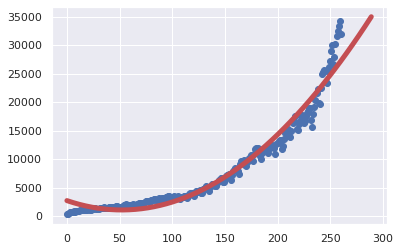

In [75]:
X_test = np.linspace(0,261+28)
y_pred = predict(X_test)
plt.scatter(X,y)
plt.plot(X_test, y_pred, c='r',lw=5)
plt.show()

In [70]:
#the model fits the data much better
#prediction for the 4 weeks ahead 
print('predicted daily free trees in 4 weeks ' + str(predict(261+28)))
print('actual free tree sends as of the day of making the model ' + str(daily_free.iloc[260].event))

predicted daily free trees in 4 weeks 34971.95620019017
actual free tree sends as of the day of making the model 31930


In [72]:
#third degree polynomial
coefs = np.polyfit(X,y,3)
predict = np.poly1d(coefs)

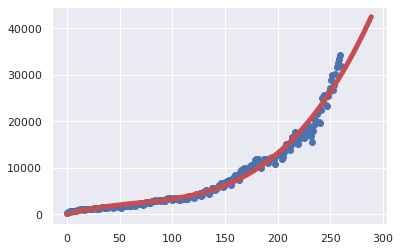

In [73]:
X_test = np.linspace(0,261+28)
y_pred = predict(X_test)
plt.scatter(X,y)
plt.plot(X_test, y_pred, c='r',lw=5)
plt.show()

In [67]:
#the model fits the data event better
#prediction for the 4 weeks ahead 
print('predicted daily free trees in 4 weeks ' + str(predict(261+28)))
print('actual free tree sends as of the day of making the model ' + str(daily_free.iloc[260].event))

predicted daily free trees in 4 weeks 42495.14798216565
actual free tree sends as of the day of making the model 31930


The third degree polynomial model provides us with a good estimation of the free-tree sends for the next 4 weeks. We can report back to the developers that the mark of 50k most likely won't be surpassed in the next month.